1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$

In [47]:
import numpy as np
# set the seed for reproducibility
np.random.seed(42)
#define the number of entries
N=1000
#generate the variables 
x1= np.random.normal(0,1,N)  #Generates an array x1 with N entries sampled from a normal distribution with mean 0 and standard deviation 1.
x2=x1 + np.random.normal(0, 3, N)
x3= 2*x1 + x2

# create a dataset with the generated variables
dataset= np.array((x1, x2, x3))

print ("generated dataset: \n")
print (dataset[:5, :])

generated dataset: 

[[ 0.49671415 -0.1382643   0.64768854 ...  0.64084286 -0.57117899
   0.57258278]
 [ 4.69478046  2.63563675  0.82657965 ... -2.00478109 -1.06037988
  -1.66212515]
 [ 5.68820877  2.35910815  2.12195672 ... -0.72309537 -2.20273786
  -0.51695959]]


* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

In [48]:
# calculate the covariance matrix
cov_matrix= np.cov(dataset, rowvar =False)  # Setting rowvar=False indicates that each column represents a variable, and each row represents an observation.
# find the eigenvectors and eigenvalues
eigenvalues, eigenvectors= np.linalg.eigh(cov_matrix) #Since the covariance matrix is symmetric, eigh is used here.
print("Covariance Matrix:")
print(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
#Eigenvectors represent the directions of maximum variance in the data, and eigenvalues represent 
#the magnitude of variance in those directions. The larger the eigenvalue, 
#the more important the corresponding eigenvector is in describing the variance in the data

Covariance Matrix:
[[ 7.59371281  4.0559008   1.61525272 ... -2.81901998 -1.94312961
  -2.31669426]
 [ 4.0559008   2.33464404  0.6366357  ... -1.84989726 -0.8526184
  -1.53942047]
 [ 1.61525272  0.6366357   0.64724508 ... -0.13730384 -0.66210889
  -0.0871043 ]
 ...
 [-2.81901998 -1.84989726 -0.13730384 ...  1.75039532  0.34257387
   1.47766795]
 [-1.94312961 -0.8526184  -0.66210889 ...  0.34257387  0.70104727
   0.26044744]
 [-2.31669426 -1.53942047 -0.0871043  ...  1.47766795  0.26044744
   1.24873772]]

Eigenvalues:
[-8.58292377e-13 -6.92017508e-13 -5.60331014e-13 -3.93869249e-13
 -3.92957285e-13 -3.68903039e-13 -2.52437357e-13 -2.46314259e-13
 -2.03228959e-13 -1.82109987e-13 -1.42956840e-13 -1.29286037e-13
 -8.24293508e-14 -5.82729093e-14 -5.76548626e-14 -5.38913441e-14
 -5.17365251e-14 -5.07768255e-14 -4.95111384e-14 -4.78921572e-14
 -4.46825823e-14 -4.40298355e-14 -4.35986271e-14 -4.28669428e-14
 -4.16465055e-14 -4.08709538e-14 -4.06728861e-14 -4.03205715e-14
 -3.91296458e-14 -3.7

* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result

In [49]:

# Center the dataset by subtracting the mean
centered_dataset = dataset - np.mean(dataset, axis=0)

# Perform Singular Value Decomposition (SVD)
U, s, Vt = np.linalg.svd(centered_dataset, full_matrices=False)

# Calculate the eigenvalues from the singular values
eigenvalues_svd = s**2 / (N - 1)

# Calculate the eigenvectors from Vt
eigenvectors_svd = Vt.T

# Print the results
print("\nEigenvalues using SVD:")
print(eigenvalues_svd)
print("\nEigenvectors using SVD:")
print(eigenvectors_svd)

# Compare with the results from the covariance matrix
print("\nEigenvalues from Covariance Matrix:")
print(eigenvalues)
print("\nEigenvectors from Covariance Matrix:")
print(eigenvectors)


Eigenvalues using SVD:
[6.68642552e+00 1.71881570e+00 2.13267983e-31]

Eigenvectors using SVD:
[[ 0.04767274 -0.00193779 -0.62763527]
 [ 0.02531635 -0.01503449  0.15629122]
 [ 0.0103369   0.01839065  0.00102866]
 ...
 [-0.01739847  0.02934646  0.01934383]
 [-0.01235978 -0.01490893  0.00257563]
 [-0.01428156  0.02571055  0.01428124]]

Eigenvalues from Covariance Matrix:
[-8.58292377e-13 -6.92017508e-13 -5.60331014e-13 -3.93869249e-13
 -3.92957285e-13 -3.68903039e-13 -2.52437357e-13 -2.46314259e-13
 -2.03228959e-13 -1.82109987e-13 -1.42956840e-13 -1.29286037e-13
 -8.24293508e-14 -5.82729093e-14 -5.76548626e-14 -5.38913441e-14
 -5.17365251e-14 -5.07768255e-14 -4.95111384e-14 -4.78921572e-14
 -4.46825823e-14 -4.40298355e-14 -4.35986271e-14 -4.28669428e-14
 -4.16465055e-14 -4.08709538e-14 -4.06728861e-14 -4.03205715e-14
 -3.91296458e-14 -3.70633221e-14 -3.55864681e-14 -3.50522550e-14
 -3.48782056e-14 -3.41744617e-14 -3.38372637e-14 -3.37031072e-14
 -3.35860116e-14 -3.33623083e-14 -3.087476

* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

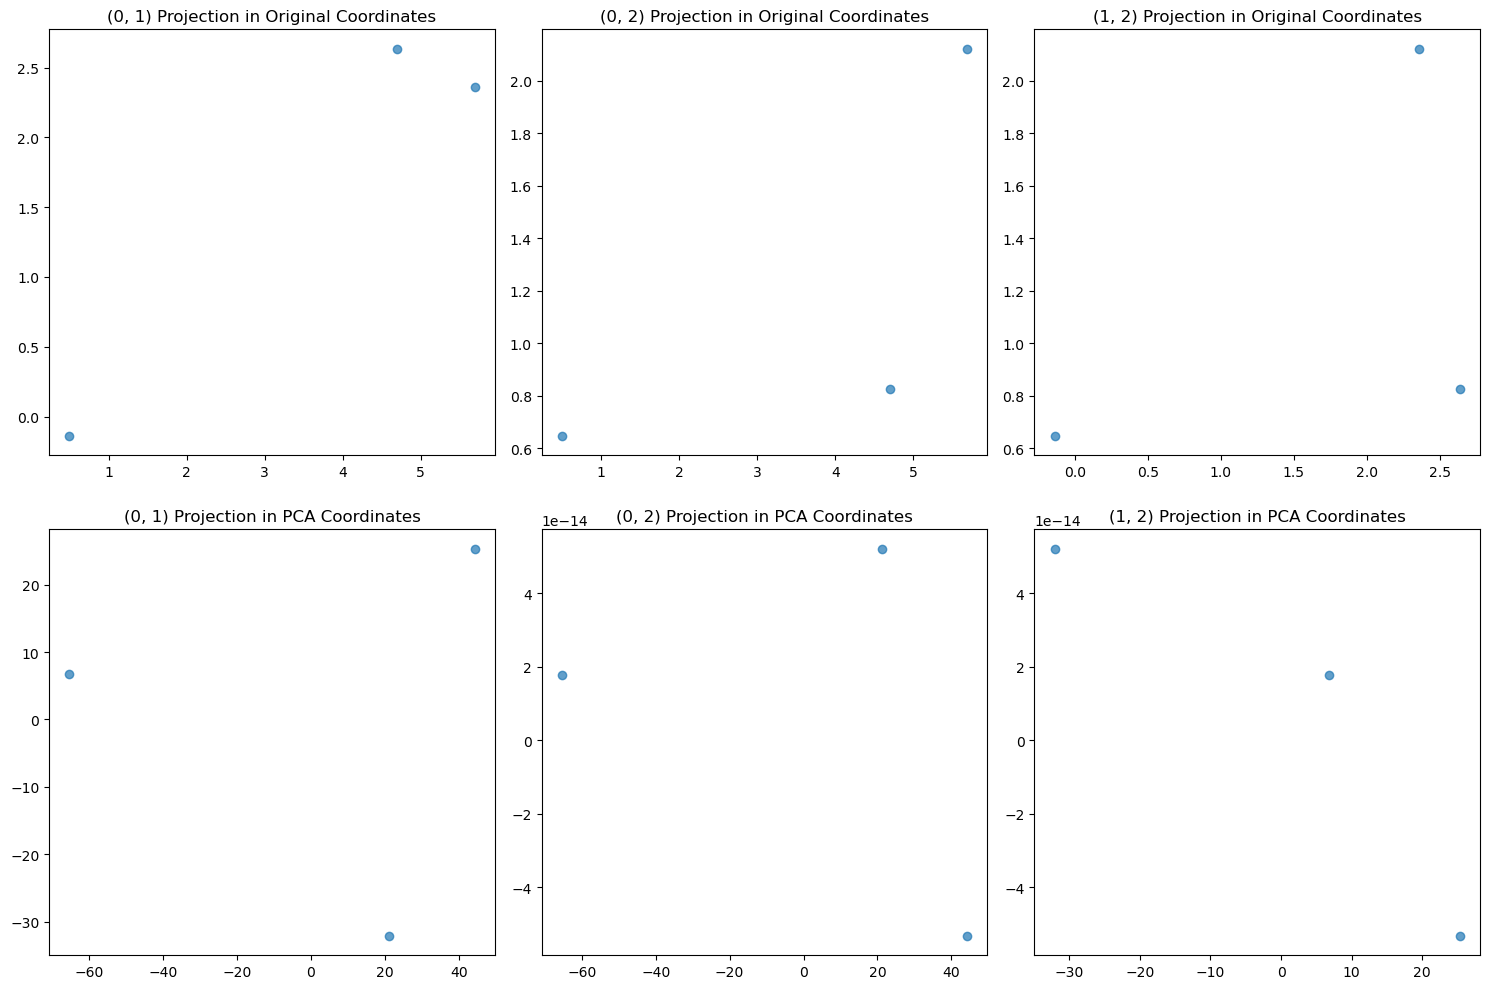

In [50]:
                                    ###credo sia sbagliato chiedo a qualcuno
import matplotlib.pyplot as plt
# Calculate the eigenvectors from Vt
eigenvectors_pca = Vt.T

# Project the data onto the new basis
projected_data = centered_dataset @ eigenvectors_pca
# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Scatter plots in the original coordinates
axes[0, 0].scatter(dataset[:, 0], dataset[:, 1], alpha=0.7)
axes[0, 0].set_title('(0, 1) Projection in Original Coordinates')

axes[0, 1].scatter(dataset[:, 0], dataset[:, 2], alpha=0.7)
axes[0, 1].set_title('(0, 2) Projection in Original Coordinates')

axes[0, 2].scatter(dataset[:, 1], dataset[:, 2], alpha=0.7)
axes[0, 2].set_title('(1, 2) Projection in Original Coordinates')

# Scatter plots in the new coordinates (PCA basis)
axes[1, 0].scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.7)
axes[1, 0].set_title('(0, 1) Projection in PCA Coordinates')

axes[1, 1].scatter(projected_data[:, 0], projected_data[:, 2], alpha=0.7)
axes[1, 1].set_title('(0, 2) Projection in PCA Coordinates')

axes[1, 2].scatter(projected_data[:, 1], projected_data[:, 2], alpha=0.7)
axes[1, 2].set_title('(1, 2) Projection in PCA Coordinates')

plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [51]:
from scipy import linalg as la
factor = 50
x = np.random.normal(loc=0.0, scale=1.0/factor, size=(10,N))  

X = np.concatenate(([x1],[x2],[x3],x),axis=0)
print(X.shape)
# eigenvalues and eigenvectors of X
l, V = la.eig(np.cov(X))
# eigenvalues and eigenvectors of X using SVD
U, spectrum, Vt = np.linalg.svd(X)

l_svd = (spectrum**2)/(N-1)
V_svd = U

print ("\neigendecomposition:",l)
print ("\nSVD:",l_svd)

print ("\neigendecomposition:",V)
print ("\nSVD:",V_svd)
    

(13, 1000)

eigendecomposition: [2.54913564e+01+0.j 2.01759849e+00+0.j 2.02059804e-16+0.j
 4.67258246e-04+0.j 4.56506030e-04+0.j 4.35588806e-04+0.j
 4.25377151e-04+0.j 3.41826935e-04+0.j 4.06168021e-04+0.j
 3.91842221e-04+0.j 3.81151688e-04+0.j 3.61681902e-04+0.j
 3.60132523e-04+0.j]

SVD: [2.56175552e+01 2.01882403e+00 4.67301334e-04 4.56507433e-04
 4.36036458e-04 4.25868221e-04 4.06174716e-04 3.91855890e-04
 3.82560378e-04 3.61908028e-04 3.60621780e-04 3.41857065e-04
 1.06420547e-30]

eigendecomposition: [[-1.10444261e-01 -5.66687946e-01  8.16496581e-01  1.42750593e-04
   9.46077142e-05 -1.65565508e-04 -1.40238475e-04 -1.93995308e-04
   5.90260105e-05  4.77817372e-05 -1.54928345e-04  1.62759388e-04
  -9.80348068e-06]
 [-5.83604008e-01  7.01953963e-01  4.08248290e-01 -2.92737517e-04
  -1.71245589e-04  1.20096390e-05  3.11761257e-04  1.08235014e-04
  -1.66187181e-05 -6.97989654e-05  2.63818146e-04 -1.69101286e-04
  -3.91620001e-05]
 [-8.04492530e-01 -4.31421929e-01 -4.08248290e-01 -7.2

In [52]:
#Do the spectral decomposition of (X) using SVD
# eigenvalues and eigenvectors of X using SVD
U, spectrum, Vt = np.linalg.svd(X)


l_svd = (spectrum**2)/(N-1)
V_svd = U

print(l_svd)
print((l_svd[0]+l_svd[1])/sum(l_svd))
#We can see that we can equate the 3rd eigen value of cov(X) to zero and still be able to retain almost 99% or even 100% of information.
l_svd[-1]=0
print(l_svd)
print(spectrum)
print(U.shape)
#But removing last eigen value is same as removing the last singular value of spectrum since they are proportional. So we 
#remove the last element of the spectrum and reconstruct the new X matrix and call it X_new. boh
spectrum[-1]=0
print(spectrum)

print(U.shape,spectrum.shape,Vt.shape)
m, n = U.shape[0], Vt.shape[0]
D = np.zeros((m, n))
# U = mxm, spectrum = mxn, Vt = nxn
for i in range(min(m, n)):# It takes whichever is minimum of (m,n)
    D[i, i] = spectrum[i] # placing the singular values of spectrum along the diagonal of mxn matrix.

#Redefined data on the basis of PCA using the dimensionality reduction by SVD technique
X_new = np.dot(U, np.dot(D, Vt))

[2.56175552e+01 2.01882403e+00 4.67301334e-04 4.56507433e-04
 4.36036458e-04 4.25868221e-04 4.06174716e-04 3.91855890e-04
 3.82560378e-04 3.61908028e-04 3.60621780e-04 3.41857065e-04
 1.06420547e-30]
0.9998541739679736
[2.56175552e+01 2.01882403e+00 4.67301334e-04 4.56507433e-04
 4.36036458e-04 4.25868221e-04 4.06174716e-04 3.91855890e-04
 3.82560378e-04 3.61908028e-04 3.60621780e-04 3.41857065e-04
 0.00000000e+00]
[1.59974803e+02 4.49088544e+01 6.83252540e-01 6.75315427e-01
 6.60000319e-01 6.52259422e-01 6.36999640e-01 6.25670868e-01
 6.18205320e-01 6.01287053e-01 6.00217592e-01 5.84393025e-01
 3.26058471e-14]
(13, 13)
[159.97480322  44.90885439   0.68325254   0.67531543   0.66000032
   0.65225942   0.63699964   0.62567087   0.61820532   0.60128705
   0.60021759   0.58439303   0.        ]
(13, 13) (13,) (1000, 1000)


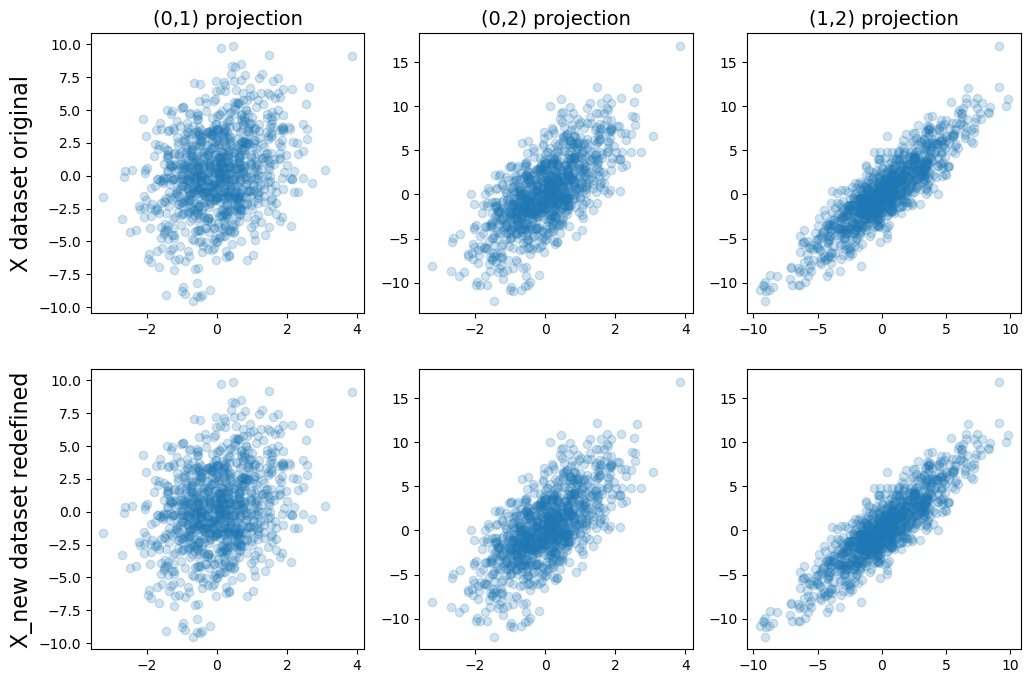

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.scatter(X[0], X[1], alpha=0.2)
#(0,1) means x[0] vs X[1] scatter plot
plt.title("(0,1) projection",fontsize=14)
plt.ylabel("X dataset original", fontsize=16)

plt.subplot(2,3,2)
plt.scatter(X[0], X[2], alpha=0.2)
plt.title("(0,2) projection",fontsize=14)

plt.subplot(2,3,3)
plt.scatter(X[1], X[2], alpha=0.2)
plt.title("(1,2) projection",fontsize=14)

plt.subplot(2,3,4)
plt.scatter(X_new[0], X_new[1], alpha=0.2)
plt.ylabel("X_new dataset redefined",fontsize=16)

plt.subplot(2,3,5)
plt.scatter(X_new[0], X_new[2], alpha=0.2)

plt.subplot(2,3,6)
plt.scatter(X_new[1], X_new[2], alpha=0.2)

plt.show()


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [54]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
